In [1]:
import nltk
from wordcloud import WordCloud
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS
import string
import emoji

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')
nlp = spacy.load('en_core_web_lg')

In [2]:
tweets = pd.read_csv("./data/dune_tweets.csv")

In [3]:
all_sentences = []
for tweet in tweets['TweetText']:
    tweet = tweet.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    tweet = tweet.replace("'", "")
    tweet = tweet.replace('"', "")
    all_sentences.append(tweet)

lines = []
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


In [4]:
lines_new = []

for word in lines:
    if word != '' and word not in STOP_WORDS:
        lines_new.append(word)


In [5]:
#stems words to their root
stemmer = SnowballStemmer(language='english')


stem = []
#nlp.Defaults.stop_words.add("I")
#nlp.Defaults.stop_words.add("i'm")
for word in lines_new:
    stem.append(stemmer.stem(word))
    

In [6]:
stem2 = []

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("im")
stopwords.append("i'm")


for word in stem:
    if word not in stopwords and re.search(r'[A-Za-z0-9]+', word):
        stem2.append(word)
 

In [7]:
tweet_words = pd.DataFrame(stem2) 
tweet_words = tweet_words[0].value_counts()
del tweet_words['dune']

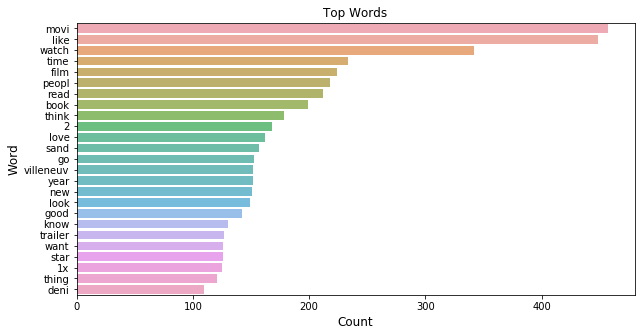

In [8]:
tweet_words = tweet_words[:25,]
plt.figure(figsize=(10,5))
sns.barplot(tweet_words.values, tweet_words.index, alpha=0.8)
plt.title('Top Words')
plt.ylabel('Word', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

In [9]:
str1 = " " 
stem2 = str1.join(lines_new) 

stem2 = nlp(stem2) 

label = [(X.text, X.label_) for X in stem2.ents]#2

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


In [10]:
# del df11['━']
# del df11['┛']
# del df11['┃']
# del df11['┓']

df11

Denis Villeneuve                    50
Cara Dune                           33
Villeneuve                          20
Timothee Chalamet                   15
Frank Herbert                       14
Jason Momoa                         13
David Lynch                         12
Duncan Idaho                        12
Lynch                               11
Denis                               11
David Lynch’s                       10
Zendaya                              9
Max                                  9
Bene Gesserit                        9
Herbert                              9
Frank Herbert’s                      9
Rebecca Ferguson                     8
Hans Zimmer                          8
Oscar Isaac                          6
denis                                6
David Lynchs                         6
Denis Villeneuves                    6
Javier Bardem                        6
Dune Messiah                         6
Gina Carano                          5
cara dune                

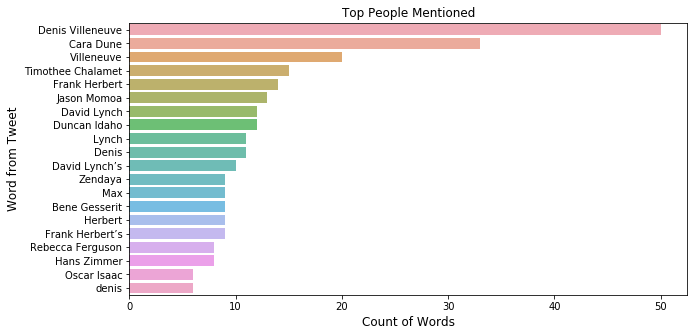

In [11]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

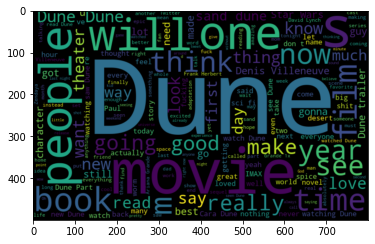

In [12]:
words = ' '.join([t for t in tweets['TweetText']])
words.lower()

wordCloud = WordCloud(height = 500, width = 800).generate(words)
plt.imshow(wordCloud, interpolation = "bilinear")